# Vérification de ce que modélise l'axe MCMC

https://www.chesdata.eu/2019-chapel-hill-expert-survey

https://static1.squarespace.com/static/5975c9bfdb29d6a05c65209b/t/5fa04ec05d3c8218b7c91450/1604341440585/2019_CHES_codebook.pdf

Ce code effectue une analyse de corrélation de Pearson entre différentes catégories de données et une variable appelée "MCMC". Les données sont nettoyées en supprimant les valeurs manquantes et infinies. Ensuite, la corrélation de Pearson est calculée et triée du plus faible au plus élevé. Un graphique en barres horizontales est créé pour représenter les valeurs de corrélation. Les niveaux de confiance sont marqués sur le graphique en fonction des valeurs de p (p-value) obtenues à partir d'un test de corrélation. Finalement, le graphique est affiché pour visualiser les relations de corrélation entre les catégories et la variable "MCMC".

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import plotly.express as px

In [39]:
# Charger les données du fichier CHES2019V3.csv dans un DataFrame appelé df_CHES2019V3
df_CHES2019V3 = pd.read_csv('data\\CHES2019V3.csv')

# Charger les données du fichier analyseMCMCvsACP.csv dans un DataFrame appelé df_ACPvsMCMC
df_ACPvsMCMC = pd.read_csv('data\\analyseMCMCvsACP_senateurs.csv')

In [40]:
df_CHES2019V3

,country,eastwest,party,party_id,eu_position,eu_position_sd,eu_salience,eu_dissent,eu_blur,eu_cohesion,...,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership,eu_econ_require,eu_political_require,eu_googov_require
0,1,1.0,PS,102,6.083334,0.288675,4.272728,2.750000,2.166667,6.250,...,6.000000,0.111111,2.111111,3.363636,2.181818,1.909091,7.500000,NaN,NaN,NaN
1,1,1.0,SP/SPA,103,6.000000,0.426401,4.181818,2.500000,1.714286,6.000,...,5.333334,0.111111,2.222222,3.545454,2.090909,1.636364,6.818182,NaN,NaN,NaN
2,1,1.0,ECOLO,104,6.583334,0.514929,4.818182,2.500000,1.428572,6.000,...,6.166666,0.111111,2.888889,5.636363,2.454546,2.363636,3.909091,NaN,NaN,NaN
3,1,1.0,AGALEV,105,6.583334,0.514929,4.818182,2.500000,1.285714,5.875,...,6.083334,0.111111,2.777778,5.636363,2.363636,2.000000,4.000000,NaN,NaN,NaN
4,1,1.0,PRL/MR,106,6.500000,0.674200,5.090909,2.000000,1.714286,5.500,...,6.416666,0.111111,2.333333,4.636363,1.727273,1.636364,7.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,45,NaN,M,4504,1.200000,0.447214,5.600000,2.000000,0.500000,NaN,...,4.000000,0.800000,2.000000,3.200000,4.400000,1.500000,9.400000,NaN,NaN,NaN
273,45,NaN,Sam,4505,6.400000,0.547723,6.800000,2.333333,4.000000,NaN,...,6.000000,0.000000,0.000000,5.000000,1.400000,5.800000,6.400000,NaN,NaN,NaN
274,45,NaN,Pi,4506,4.800000,0.447214,4.600000,3.333333,4.500000,NaN,...,6.000000,0.000000,0.000000,5.800000,6.200000,8.400000,2.800000,NaN,NaN,NaN
275,45,NaN,V,4507,6.600000,0.547723,8.000000,2.000000,2.500000,NaN,...,6.000000,0.000000,0.000000,3.600000,0.200000,4.600000,7.400000,NaN,NaN,NaN


In [41]:
df_ACPvsMCMC = df_ACPvsMCMC.drop("Unnamed: 0", axis=1)

df_ACPvsMCMC

,MCMC,Position 1,Position 2,Groupe politique
0,-0.016734,1.653898,-0.325824,CRCE
1,-0.025674,1.653898,-0.325824,CRCE
2,0.015790,1.569818,-0.465005,GEST
3,0.019070,-0.360804,1.394170,Les Indépendants
4,-0.014777,-0.362222,1.333145,Les Indépendants
5,-0.025007,-0.686164,-0.569135,Les Républicains
6,0.015921,-0.760330,-0.531635,Les Républicains
7,0.048348,-0.750813,-0.528098,Les Républicains
8,0.051046,-0.793763,-0.468855,Les Républicains
9,0.001803,-0.746174,-0.551696,Les Républicains


In [42]:
# Calculer la moyenne des colonnes 'MCMC', 'Position 1' et 'Position 2' du DataFrame df_ACPvsMCMC, groupées par la colonne 'Groupe politique (abrégé)'
df_ACPvsMCMC_mean = df_ACPvsMCMC.groupby('Groupe politique')[['MCMC', 'Position 1', 'Position 2']].mean()
df_ACPvsMCMC_mean

,MCMC,Position 1,Position 2
Groupe politique,,,
CRCE,-0.021204,1.653898,-0.325824
GEST,0.015790,1.569818,-0.465005
Les Indépendants,0.002146,-0.361513,1.363658
Les Républicains,0.015454,-0.750550,-0.534293
NI,0.009717,0.486188,-0.068473
RDPI,0.002397,-0.141147,3.058191
RDSE,-0.000920,0.333260,1.813267
SER,-0.017474,1.620241,-0.324761
UC,0.026781,-0.628880,-0.295610


In [43]:
# Réinitialiser l'index du DataFrame df_ACPvsMCMC_mean
df_ACPvsMCMC_mean = df_ACPvsMCMC_mean.reset_index()

# Créer un graphique 3D interactif avec les données du DataFrame df_ACPvsMCMC_mean
fig = px.scatter_3d(df_ACPvsMCMC_mean, x='MCMC', y='Position 1', z='Position 2', color='Groupe politique')

# Mettre à jour la mise en page du graphique avec un titre et les titres des axes

fig.update_layout(title="Graphique 3D interactif",
                  scene=dict(xaxis_title='MCMC', 
                             yaxis_title='Position 1', 
                             zaxis_title='Position 2'))

fig.show()

In [44]:
# Création du nouveau dataframe df_CHES2019V3_fr avec la première occurrence de FI
df_CHES2019V3_fr = df_CHES2019V3[df_CHES2019V3['party'].isin(['PS','PCF', 'EELV', 'LR', 'RN', 'MoDem', 'LREM', 'FI'])].copy()

# Suppression les lignes où country est différent de 6
df_CHES2019V3_fr = df_CHES2019V3_fr[df_CHES2019V3_fr['country'] == 6]

# Suppression des colonnes "country", "eastwest", "party_id"
df_CHES2019V3_fr = df_CHES2019V3_fr.drop(columns=['country', 'eastwest', 'party_id'])

# Définition de la colonne "party" comme index
df_CHES2019V3_fr = df_CHES2019V3_fr.set_index('party')

df_CHES2019V3_fr

,eu_position,eu_position_sd,eu_salience,eu_dissent,eu_blur,eu_cohesion,eu_foreign,eu_intmark,eu_budgets,eu_asylum,...,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership,eu_econ_require,eu_political_require,eu_googov_require
party,,,,,,,,,,,,,,,,,,,,,
PCF,3.000000,1.069045,4.625000,3.666667,4.000000,4.800000,2.800000,2.4,1.333333,3.833333,...,4.833334,1.500000,2.000000,4.125000,6.857143,2.857143,5.000000,NaN,NaN,NaN
PS,6.125000,0.640870,6.375000,5.333334,4.250000,6.200000,4.500000,4.8,2.833333,4.428571,...,3.500000,3.333333,2.285714,4.125000,3.857143,3.285714,5.250000,NaN,NaN,NaN
EELV,6.375000,0.744024,6.875000,3.666667,1.750000,6.000000,4.833334,5.0,4.000000,5.428571,...,2.666667,3.166667,1.571428,5.750000,4.285714,4.142857,3.500000,NaN,NaN,NaN
LR,5.500000,0.925820,6.000000,6.666666,4.000000,5.400000,2.500000,5.8,4.166666,3.000000,...,5.000000,2.666667,6.500000,2.285714,3.714286,3.000000,7.375000,NaN,NaN,NaN
RN,1.375000,0.517549,8.625000,2.666667,2.500000,2.000000,1.250000,1.6,1.000000,1.125000,...,4.600000,2.333333,9.500000,7.750000,9.428572,5.714286,9.500000,NaN,NaN,NaN
MoDem,6.714286,0.487950,7.125000,2.666667,2.666667,5.400000,3.666667,6.6,5.000000,4.500000,...,4.200000,3.000000,2.285714,3.375000,3.666667,3.571429,6.428571,NaN,NaN,NaN
LREM,6.833334,0.408248,8.833333,3.000000,1.000000,6.666666,4.200000,6.5,4.600000,4.750000,...,4.750000,4.750000,3.200000,3.333333,5.000000,2.833333,9.333333,NaN,NaN,NaN
FI,2.875000,1.125992,6.875000,6.500000,4.750000,3.833333,2.166667,2.2,1.166667,2.833333,...,5.200000,2.500000,1.833333,7.000000,9.571428,5.714286,7.750000,NaN,NaN,NaN


In [45]:
# Passage des index en colonne
df_ACPvsMCMC_mean = df_ACPvsMCMC_mean.reset_index()

# Changement des valeurs dans la colonne index conformément à la correspondance spécifiée
df_ACPvsMCMC_mean['Groupe politique'] = df_ACPvsMCMC_mean['Groupe politique'].replace({'GEST': 'EELV',
                                                                'CRCE': 'PCF',
                                                                'Les Républicains': 'LR',
                                                                'RDPI': 'LREM',
                                                                'SER': 'PS'})

# Passage de la colonne modifiée en nouvel index
df_ACPvsMCMC_mean = df_ACPvsMCMC_mean.set_index('Groupe politique')
df_ACPvsMCMC_mean

,index,MCMC,Position 1,Position 2
Groupe politique,,,,
PCF,0,-0.021204,1.653898,-0.325824
EELV,1,0.015790,1.569818,-0.465005
Les Indépendants,2,0.002146,-0.361513,1.363658
LR,3,0.015454,-0.750550,-0.534293
NI,4,0.009717,0.486188,-0.068473
LREM,5,0.002397,-0.141147,3.058191
RDSE,6,-0.000920,0.333260,1.813267
PS,7,-0.017474,1.620241,-0.324761
UC,8,0.026781,-0.628880,-0.295610


In [46]:
df_ACPvsMCMC_mean = df_ACPvsMCMC_mean.drop(["index"], axis=1)
df_ACPvsMCMC_mean = df_ACPvsMCMC_mean.drop(["Les Indépendants", "NI", "RDSE", "UC"], axis=0)
df_ACPvsMCMC_mean


,MCMC,Position 1,Position 2
Groupe politique,,,
PCF,-0.021204,1.653898,-0.325824
EELV,0.015790,1.569818,-0.465005
LR,0.015454,-0.750550,-0.534293
LREM,0.002397,-0.141147,3.058191
PS,-0.017474,1.620241,-0.324761


In [48]:
# Création du dataframe df_ACP_MCMC_CHES2019V3 en fusionnant les dataframes
df_ACP_MCMC_CHES2019V3 = df_ACPvsMCMC_mean.merge(df_CHES2019V3_fr, left_index=True, right_index=True)

# Suppression des colonnes 'eu_econ_require', 'eu_political_require', 'eu_googov_require' dont les valeurs des lignes sont NA
df_ACP_MCMC_CHES2019V3 = df_ACP_MCMC_CHES2019V3.drop(['eu_econ_require', 'eu_political_require', 'eu_googov_require'], axis=1)

df_ACP_MCMC_CHES2019V3

,MCMC,Position 1,Position 2,eu_position,eu_position_sd,eu_salience,eu_dissent,eu_blur,eu_cohesion,eu_foreign,...,nationalism,urban_rural,protectionism,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership
PCF,-0.021204,1.653898,-0.325824,3.000000,1.069045,4.625000,3.666667,4.00,4.800000,2.800000,...,2.857143,1.750000,7.625000,4.833334,1.500000,2.000000,4.125000,6.857143,2.857143,5.000000
EELV,0.015790,1.569818,-0.465005,6.375000,0.744024,6.875000,3.666667,1.75,6.000000,4.833334,...,1.250000,3.833333,5.142857,2.666667,3.166667,1.571428,5.750000,4.285714,4.142857,3.500000
LR,0.015454,-0.750550,-0.534293,5.500000,0.925820,6.000000,6.666666,4.00,5.400000,2.500000,...,7.000000,5.800000,3.857143,5.000000,2.666667,6.500000,2.285714,3.714286,3.000000,7.375000
LREM,0.002397,-0.141147,3.058191,6.833334,0.408248,8.833333,3.000000,1.00,6.666666,4.200000,...,4.000000,2.500000,2.833333,4.750000,4.750000,3.200000,3.333333,5.000000,2.833333,9.333333
PS,-0.017474,1.620241,-0.324761,6.125000,0.640870,6.375000,5.333334,4.25,6.200000,4.500000,...,2.750000,2.600000,4.714286,3.500000,3.333333,2.285714,4.125000,3.857143,3.285714,5.250000


Questions générales sur l'intégration européenne :

1. EU_POSITION = orientation globale de la direction du parti envers l'intégration européenne en 2019.

2. EU_POSITION_SD = écart-type de la position des experts sur l'orientation globale de la direction du parti envers l'intégration européenne en 2019.

3. EU_SALIENCE = importance relative de l'intégration européenne dans la position publique du parti en 2019.

4. EU_DISSENT = degré de dissension sur l'intégration européenne en 2019.

5. EU_BLUR = degré de confusion de la position du parti sur l'intégration européenne en 2019.

Questions spécifiques sur les politiques de l'UE :

6. EU_COHESION = position de la direction du parti en 2019 sur la cohésion de l'UE ou la politique régionale.

7. EU_FOREIGN = position de la direction du parti en 2019 sur la politique étrangère et de sécurité de l'UE.

8. EU_INTMARK = position de la direction du parti en 2019 sur le marché intérieur de l'UE.

9. EU_BUDGETS = position de la direction du parti en 2019 sur l'autorité de l'UE en matière de politique économique et budgétaire.

10. EU_ASYLUM = position de la direction du parti en 2019 sur l'autorité de l'UE en matière de politique d'asile.

Questions idéologiques :

11. LRGEN = position générale du parti en 2019 en termes d'orientation idéologique.

12. LRECON = position du parti en 2019 en termes d'orientation idéologique sur les questions économiques.

13. LRECON_SD = écart-type de la position des experts sur la position idéologique du parti en 2019 sur les questions économiques.

14. LRECON_SALIENCE = importance relative des questions économiques dans la position publique du parti en 2019.

15. LRECON_DISSENT = degré de dissension sur les questions économiques en 2019.

16. LRECON_BLUR = degré de confusion de la position du parti sur les questions économiques en 2019.

17. GALTAN = position du parti en 2019 en termes de ses opinions sur les valeurs sociales et culturelles.

18. GALTAN_SD = écart-type de la position des experts sur les opinions du parti en 2019 sur les libertés et droits démocratiques.

19. GALTAN_SALIENCE = importance relative des questions libertariennes/traditionnelles dans la position publique du parti en 2019.

20. GALTAN_DISSENT = degré de dissension sur les questions libertariennes/traditionnelles en 2019.

21. GALTAN_BLUR = degré de confusion de la position du parti sur les questions libertariennes/traditionnelles en 2019.

Dimensions politiques :

22. IMMIGRATE_POLICY = position sur la politique d'immigration.

23. IMMIGRATE_SALIENCE = importance relative de la politique d'immigration dans la position publique du parti en 2019.

24. IMMIGRATE_DISSENT = degré de dissension sur la politique d'immigration en 2019.

25. MULTICULTURALISM = position sur l'intégr

ation des immigrants et demandeurs d'asile (multiculturalisme vs assimilation).

26. MULTICULT_SALIENCE = importance relative des questions liées aux immigrants et demandeurs d'asile dans la position publique du parti en 2019.

27. MULTICULT_DISSENT = degré de dissension sur les questions liées aux immigrants et demandeurs d'asile en 2019.

28. REDISTRIBUTION = position sur la redistribution des richesses des riches vers les pauvres.

29. REDIST_SALIENCE = importance relative de la redistribution dans la position publique du parti en 2019.

30. ENVIRONMENT = position vis-à-vis de la durabilité environnementale.

31. ENVIRO_SALIENCE = importance relative de la durabilité environnementale dans la position publique du parti en 2019.

32. SPENDVTAX = position sur l'amélioration des services publics par rapport à la réduction des impôts en 2019.

33. DEREGULATION = position sur la déréglementation des marchés.

34. ECON_INTERVEN = position sur l'intervention de l'État dans l'économie.

35. CIVLIB_LAWORDER = position sur les libertés civiles par rapport à la loi et l'ordre.

36. SOCIALLIFESTYLE = position sur le mode de vie social (par exemple, droits des homosexuels, égalité des sexes).

37. RELIGIOUS_PRINCIPLES = position sur le rôle des principes religieux en politique.

38. ETHNIC_MINORITIES = position vis-à-vis des droits des minorités ethniques.

39. NATIONALISM = position sur le cosmopolitisme vs le nationalisme.

40. URBAN_RURAL = position sur les intérêts urbains/ruraux.

41. PROTECTIONISM = position sur la libéralisation/protectionnisme des échanges commerciaux.

42. REGIONS = position sur la décentralisation politique aux régions/localités.

43. RUSSIAN_INTERFERENCE = importance de l'ingérence russe dans les affaires intérieures pour la direction du parti.

44. ANTI_ISLAM_RHETORIC = importance de la rhétorique anti-islam pour la direction du parti.

Caractéristiques du parti :

45. PEOPLE_VS_ELITE = position sur le peuple par rapport aux représentants élus.

46. ANTIELITE_SALIENCE = importance de la rhétorique anti-establishment et anti-élite.

47. CORRUPT_SALIENCE = importance de la réduction de la corruption politique.

48. MEMBERS_VS_LEADERSHIP = position sur la direction du parti par rapport aux membres/activistes dans les choix de politique du parti.

Questions sur l'UE pour la Turquie :

49. EU_ECON_REQUIRE = position sur la satisfaction des exigences économiques de l'adhésion à l'UE.

50. EU_POLITICAL_REQUIRE = position sur la satisfaction des exigences politiques de l'adhésion à l'UE.

51. EU_GOOGOV_REQUIRE = position sur la satisfaction des exigences de bonne gouvernance de l'adhésion à l'UE.

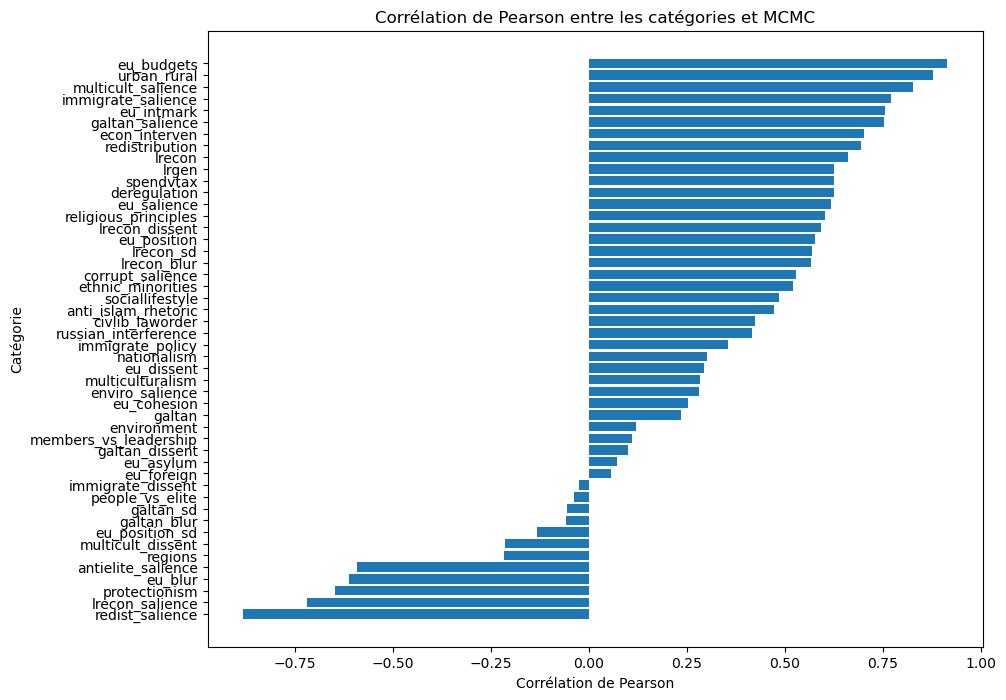

In [49]:
# Sélection des colonnes pour la corrélation
columns_for_correlation = ['eu_position', 'eu_position_sd', 'eu_salience', 'eu_dissent', 'eu_blur', 'eu_cohesion',
                           'eu_foreign', 'eu_intmark', 'eu_budgets', 'eu_asylum', 'lrgen', 'lrecon', 'lrecon_sd',
                           'lrecon_salience', 'lrecon_dissent', 'lrecon_blur', 'galtan', 'galtan_sd',
                           'galtan_salience', 'galtan_dissent', 'galtan_blur', 'immigrate_policy',
                           'immigrate_salience', 'immigrate_dissent', 'multiculturalism', 'multicult_salience',
                           'multicult_dissent', 'redistribution', 'redist_salience', 'environment',
                           'enviro_salience', 'spendvtax', 'deregulation', 'econ_interven', 'civlib_laworder',
                           'sociallifestyle', 'religious_principles', 'ethnic_minorities', 'nationalism',
                           'urban_rural', 'protectionism', 'regions', 'russian_interference', 'anti_islam_rhetoric',
                           'people_vs_elite', 'antielite_salience', 'corrupt_salience', 'members_vs_leadership']

# Nettoyage des données en supprimant les valeurs problématiques
df_cleaned = df_ACP_MCMC_CHES2019V3.dropna()  # Supprimer les lignes avec des valeurs manquantes
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan).dropna()  # Supprimer les valeurs infinies

# Calcul de la corrélation de Pearson
correlation_MCMC = df_cleaned[columns_for_correlation].corrwith(df_cleaned['MCMC'], method='pearson')

# Tri des valeurs de corrélation de la plus faible à la plus grande
correlation_sorted = correlation_MCMC.sort_values()

# Création du graphique
plt.figure(figsize=(10, 8))
plt.barh(correlation_sorted.index, correlation_sorted.values)
plt.xlabel('Corrélation de Pearson')
plt.ylabel('Catégorie')
plt.title('Corrélation de Pearson entre les catégories et MCMC')

# Marquer les niveaux de confiance
for category, corr in correlation_sorted.items():
    p_value = pearsonr(df_cleaned[category], df_cleaned['MCMC'])[1]
    if p_value < 0.01:
        plt.annotate('**'.format(p_value), (corr, category), color='red')
    elif p_value < 0.05:
        plt.annotate('*'.format(p_value), (corr, category), color='blue')

# Affichage du graphique
plt.show()



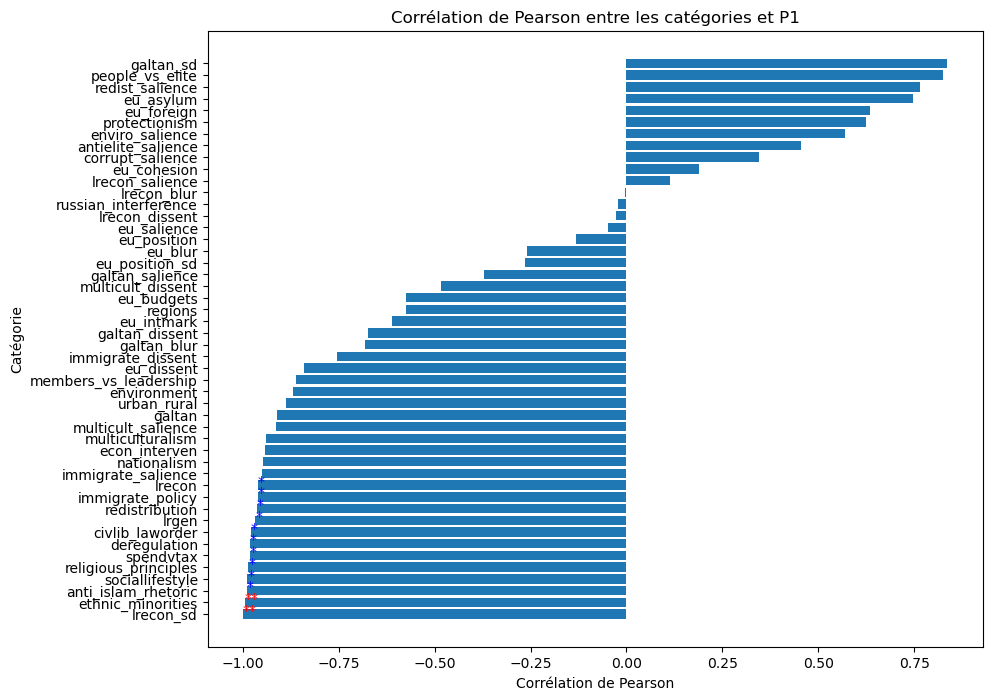

In [50]:
# Nettoyage des données en supprimant les valeurs problématiques
df_cleaned = df_ACP_MCMC_CHES2019V3.dropna()  # Supprimer les lignes avec des valeurs manquantes
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan).dropna()  # Supprimer les valeurs infinies

# Calcul de la corrélation de Pearson
correlation_P1 = df_cleaned[columns_for_correlation].corrwith(df_cleaned['Position 1'], method='pearson')

# Tri des valeurs de corrélation de la plus faible à la plus grande
correlation_sorted = correlation_P1.sort_values()

# Création du graphique
plt.figure(figsize=(10, 8))
plt.barh(correlation_sorted.index, correlation_sorted.values)
plt.xlabel('Corrélation de Pearson')
plt.ylabel('Catégorie')
plt.title('Corrélation de Pearson entre les catégories et P1')

# Marquer les niveaux de confiance
for category, corr in correlation_sorted.items():
    p_value = pearsonr(df_cleaned[category], df_cleaned['Position 1'])[1]
    if p_value < 0.01:
        plt.annotate('**'.format(p_value), (corr, category), color='red')
    elif p_value < 0.05:
        plt.annotate('*'.format(p_value), (corr, category), color='blue')

# Affichage du graphique
plt.show()



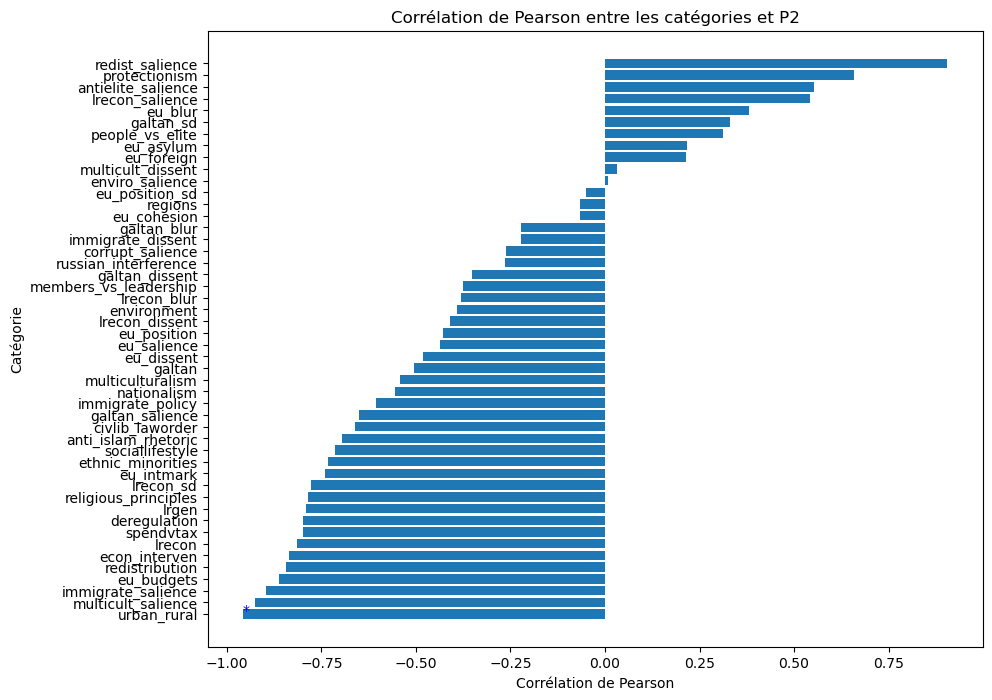

In [51]:
# Nettoyage des données en supprimant les valeurs problématiques
df_cleaned = df_ACP_MCMC_CHES2019V3.dropna()  # Supprimer les lignes avec des valeurs manquantes
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan).dropna()  # Supprimer les valeurs infinies

# Calcul de la corrélation de Pearson
correlation_P2 = df_cleaned[columns_for_correlation].corrwith(df_cleaned['Position 2'], method='pearson')

# Tri des valeurs de corrélation de la plus faible à la plus grande
correlation_sorted = correlation_P2.sort_values()

# Création du graphique
plt.figure(figsize=(10, 8))
plt.barh(correlation_sorted.index, correlation_sorted.values)
plt.xlabel('Corrélation de Pearson')
plt.ylabel('Catégorie')
plt.title('Corrélation de Pearson entre les catégories et P2')

# Marquer les niveaux de confiance
for category, corr in correlation_sorted.items():
    p_value = pearsonr(df_cleaned[category], df_cleaned['Position 2'])[1]
    if p_value < 0.01:
        plt.annotate('**'.format(p_value), (corr, category), color='red')
    elif p_value < 0.05:
        plt.annotate('*'.format(p_value), (corr, category), color='blue')

# Affichage du graphique
plt.show()

